In [33]:
from VelibData import VelibData
import missingno as msn
import pandas as pd
from matplotlib import pyplot as plt
from ast import literal_eval

In [2]:
velibData = VelibData()
stationsInfo = velibData.getStationsInfo()
stationsStatus = velibData.getStationsStatus()

In [3]:
stationsInfo.head(10)

station_id                                 name        lat       lon  \
0    213688169        Benjamin Godard - Victor Hugo  48.865983  2.275725   
1    653222953            Mairie de Rosny-sous-Bois  48.871257  2.486581   
2  17278902806           Rouget de L'isle - Watteau  48.778193  2.396302   
3        36255                   Toudouze - Clauzel  48.879296  2.337360   
4     37815204                      Mairie du 12ème  48.840855  2.387555   
5    251039991          Cassini - Denfert-Rochereau  48.837526  2.336035   
6     85002689             Jourdan - Stade Charléty  48.819428  2.343335   
7   2515829865                            Basilique  48.936269  2.358867   
8    516709288  Charonne - Robert et Sonia Delaunay  48.855908  2.392571   
9    120827885             Messine - Place Du Pérou  48.875448  2.315508   

   capacity stationCode rental_methods  
0        35       16107            NaN  
1        30       31104   [CREDITCARD]  
2        20       44015            NaN  
3        21        9020   [CREDITCARD]  
4        30       12109            NaN  
5        25       14111   [CREDITCARD]  
6        60       14014   [CREDITCARD]  
7        22       32017   [CREDITCARD]  
8        20       11104            NaN  
9        12        8026   [CREDITCARD]

In [4]:
stationsInfo = stationsInfo.fillna('Other')

In [5]:
stationsInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   station_id      1470 non-null   int64  
 1   name            1470 non-null   object 
 2   lat             1470 non-null   float64
 3   lon             1470 non-null   float64
 4   capacity        1470 non-null   int64  
 5   stationCode     1470 non-null   object 
 6   rental_methods  1470 non-null   object 
dtypes: float64(2), int64(2), object(3)
memory usage: 80.5+ KB


In [6]:
stationsInfo.describe().T

count          mean           std          min           25%  \
station_id  1470.0  1.420564e+09  3.900013e+09  6245.000000  6.356589e+07   
lat         1470.0  4.885847e+01  3.081914e-02    48.764615  4.883768e+01   
lon         1470.0  2.341071e+00  5.664764e-02     2.165597  2.302577e+00   
capacity    1470.0  3.104150e+01  1.200739e+01     0.000000  2.300000e+01   

                     50%           75%           max  
station_id  2.067947e+08  6.530808e+08  1.852364e+10  
lat         4.885867e+01  4.887950e+01  4.895143e+01  
lon         2.343684e+00  2.378658e+00  2.538242e+00  
capacity    2.900000e+01  3.700000e+01  7.400000e+01

<Axes: >

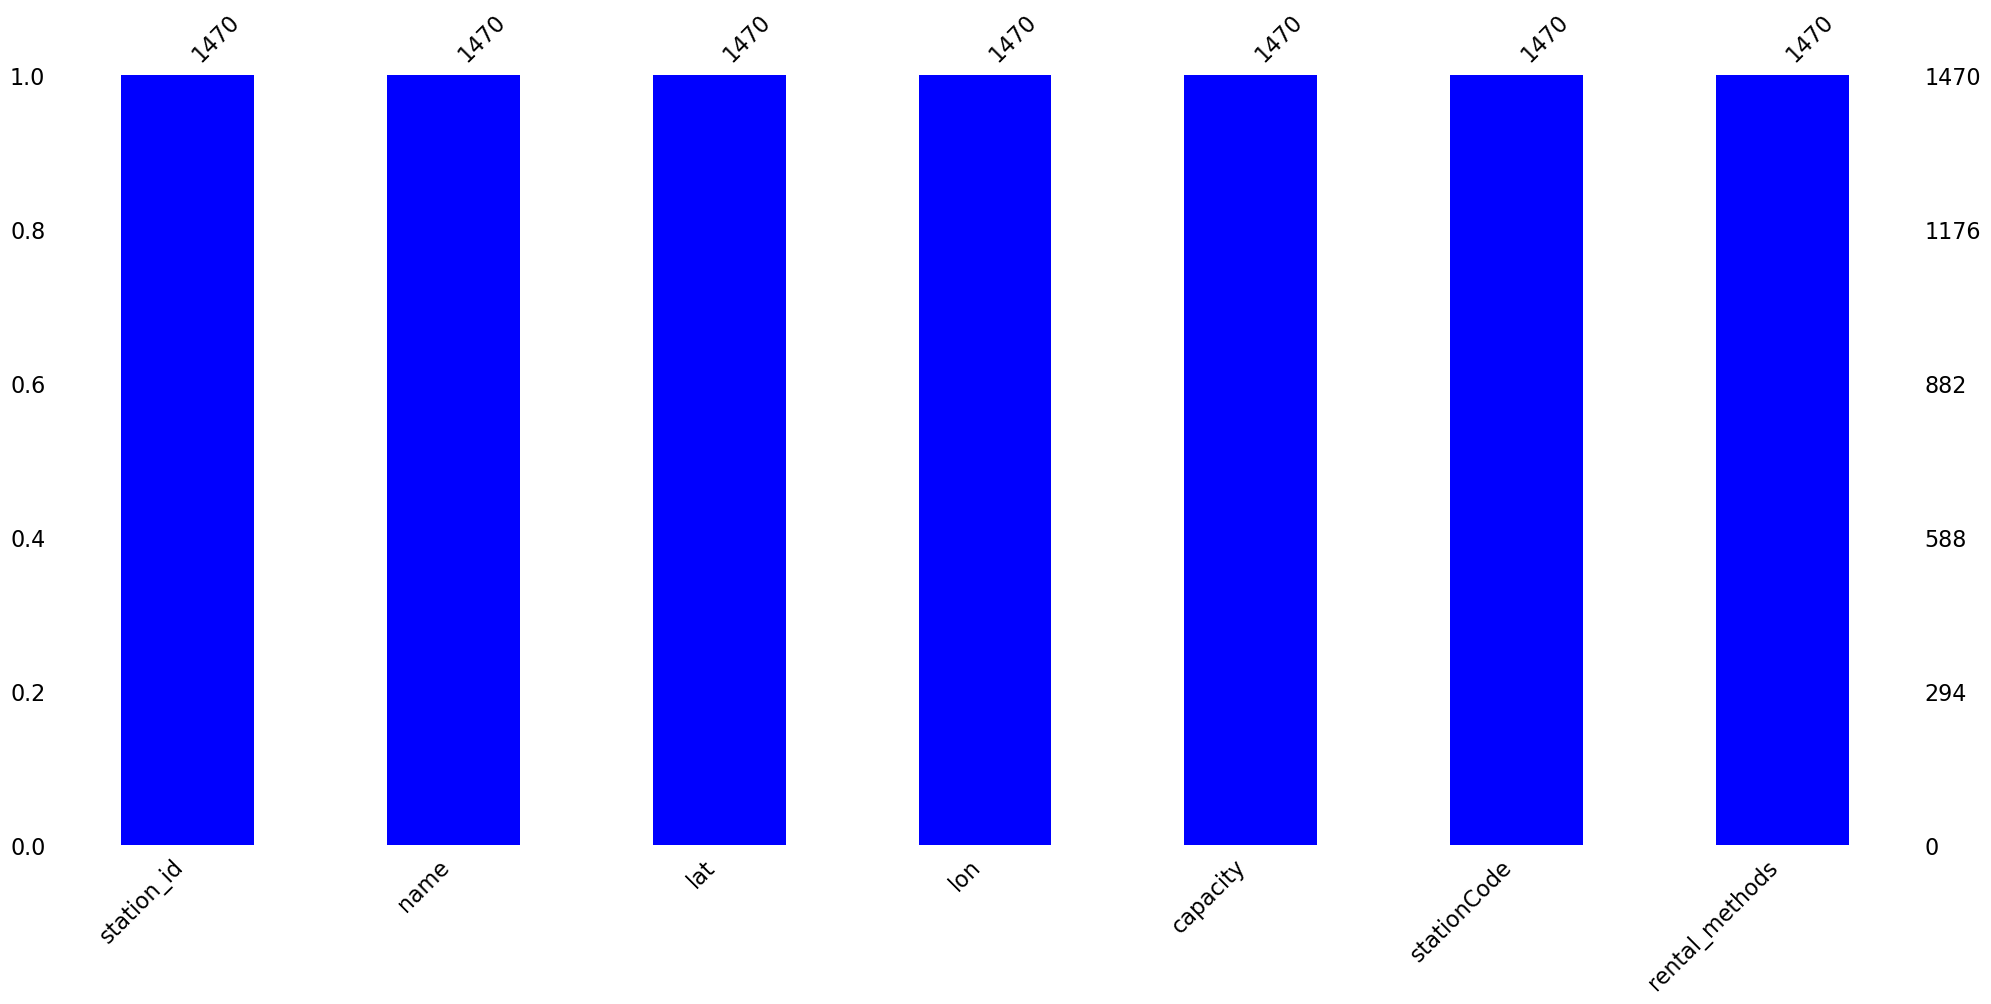

In [7]:
#check for missing values
msn.bar(stationsInfo, color = 'blue')

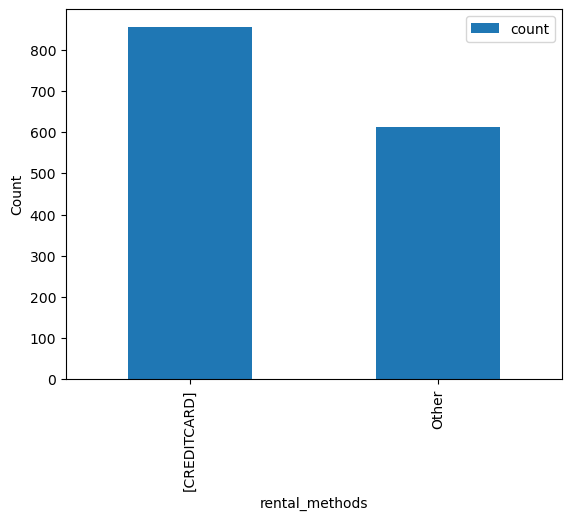

In [8]:
stationsInfo['rental_methods'].value_counts().plot(kind = 'bar')
plt.ylabel('Count')
plt.legend()

c:\Users\BELKESSA\AppData\Local\anaconda3\envs\EDA\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:121: RuntimeWarning: invalid value encountered in cast
  if np.all(locs == locs.astype(int)):


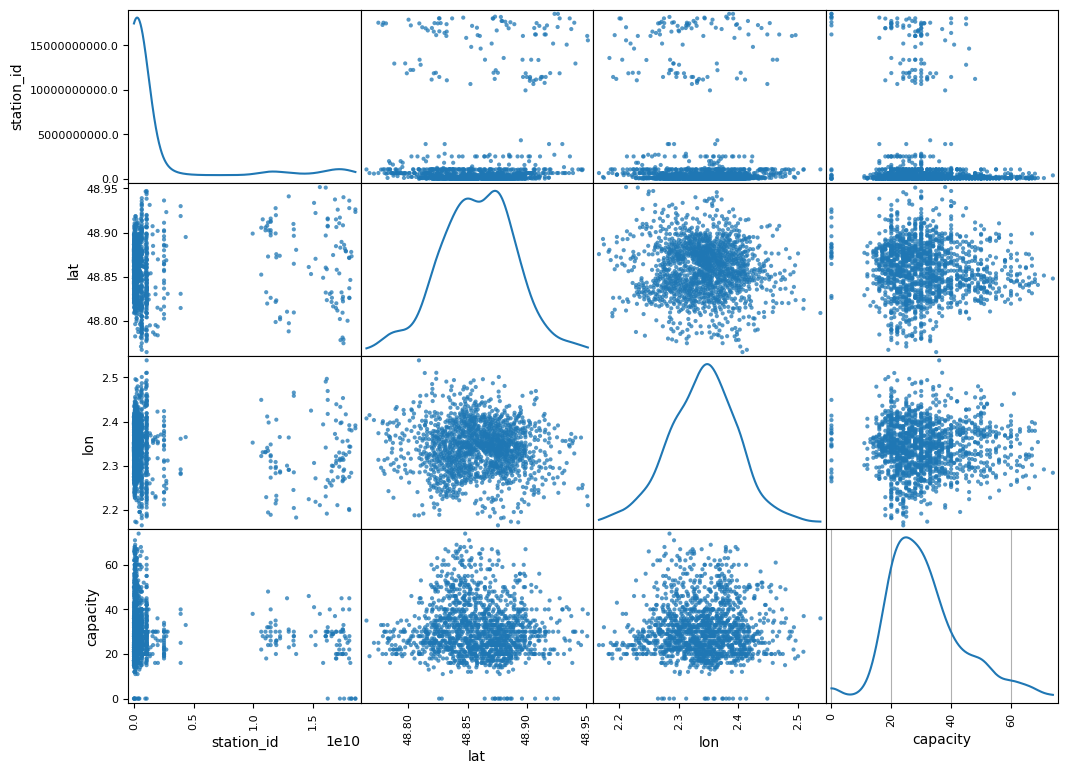

In [9]:
pd.plotting.scatter_matrix(stationsInfo, alpha = 0.75, figsize = (12, 9), diagonal = 'kde')
plt.grid()

In [10]:
import folium
folium_map = folium.Map(location=[48.866667,  2.333333],
                        zoom_start=13,
                        tiles="CartoDB dark_matter")

In [11]:
for index, row in stationsInfo.iterrows():
    capacity = (row["capacity"])
    radius = capacity/7
    if capacity>0:
        color="#6495ED" # blue
    else:
        color="#A9A9A9" # grey
    
    folium.CircleMarker(location=(row["lat"],
                                  row["lon"]),
                        radius=radius,
                        color=color,
                        fill=True,
                        tooltip=folium.map.Tooltip(str('Station :' + str(row['name']) + '\n'+ ',capacity : ' + str(row['capacity'])))).add_to(folium_map)

In [12]:
folium_map

In [13]:
stationsStatus.columns

Index(['stationCode', 'station_id', 'num_bikes_available', 'numBikesAvailable',
       'num_bikes_available_types', 'num_docks_available', 'numDocksAvailable',
       'is_installed', 'is_returning', 'is_renting', 'last_reported'],
      dtype='object')

In [14]:
stationsStatus = stationsStatus.drop(columns=['num_bikes_available', 'num_docks_available'])
stationsStatus

stationCode   station_id  numBikesAvailable  \
0          16107    213688169                  9   
1          31104    653222953                 25   
2          44015  17278902806                  9   
3           9020        36255                  0   
4          12109     37815204                 19   
...          ...          ...                ...   
1465       23011     54000634                 10   
1466        4010    476155906                 22   
1467       32012    653046369                 11   
1468        8002    394404659                 36   
1469        4005    516395829                  5   

                num_bikes_available_types  numDocksAvailable  is_installed  \
0       [{'mechanical': 4}, {'ebike': 5}]                 26             1   
1      [{'mechanical': 8}, {'ebike': 17}]                  3             1   
2       [{'mechanical': 2}, {'ebike': 7}]                 11             1   
3       [{'mechanical': 0}, {'ebike': 0}]                 19             1   
4      [{'mechanical': 16}, {'ebike': 3}]                 11             1   
...                                   ...                ...           ...   
1465    [{'mechanical': 5}, {'ebike': 5}]                 16             1   
1466  [{'mechanical': 12}, {'ebike': 10}]                  4             1   
1467    [{'mechanical': 4}, {'ebike': 7}]                 27             1   
1468   [{'mechanical': 29}, {'ebike': 7}]                 10             1   
1469    [{'mechanical': 0}, {'ebike': 5}]                  7             1   

      is_returning  is_renting  last_reported  
0                1           1     1705221002  
1                1           1     1705221008  
2                1           1     1705221120  
3                1           1     1705221003  
4                1           1     1705221122  
...            ...         ...            ...  
1465             1           1     1705220870  
1466             1           1     1705221052  
1467             1           1     1705221112  
1468             1           1     1705221120  
1469             1           1     1705220862  

[1470 rows x 9 columns]

In [15]:
stationsStatus.describe().T

count          mean           std           min  \
station_id         1470.0  1.420564e+09  3.900013e+09  6.245000e+03   
numBikesAvailable  1470.0  1.166190e+01  1.084462e+01  0.000000e+00   
numDocksAvailable  1470.0  1.864150e+01  1.163011e+01  0.000000e+00   
is_installed       1470.0  9.938776e-01  7.803273e-02  0.000000e+00   
is_returning       1470.0  9.625850e-01  1.898410e-01  0.000000e+00   
is_renting         1470.0  9.625850e-01  1.898410e-01  0.000000e+00   
last_reported      1470.0  1.704099e+09  1.224148e+07  1.523425e+09   

                            25%           50%           75%           max  
station_id         6.356589e+07  2.067947e+08  6.530808e+08  1.852364e+10  
numBikesAvailable  4.000000e+00  8.000000e+00  1.700000e+01  7.000000e+01  
numDocksAvailable  1.000000e+01  1.700000e+01  2.500000e+01  6.100000e+01  
is_installed       1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  
is_returning       1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  
is_renting         1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  
last_reported      1.705221e+09  1.705221e+09  1.705221e+09  1.705221e+09

In [16]:
stations_df = pd.merge(stationsStatus, stationsInfo, on='stationCode', how='inner', suffixes=('', '_df2')) 
stations_df = stations_df.drop(columns=['station_id_df2'], axis=1)
stations_df.head(10)

stationCode   station_id  numBikesAvailable  \
0       16107    213688169                  9   
1       31104    653222953                 25   
2       44015  17278902806                  9   
3        9020        36255                  0   
4       12109     37815204                 19   
5       14111    251039991                  7   
6       14014     85002689                 26   
7       32017   2515829865                 11   
8       11104    516709288                  7   
9        8026    120827885                  8   

            num_bikes_available_types  numDocksAvailable  is_installed  \
0   [{'mechanical': 4}, {'ebike': 5}]                 26             1   
1  [{'mechanical': 8}, {'ebike': 17}]                  3             1   
2   [{'mechanical': 2}, {'ebike': 7}]                 11             1   
3   [{'mechanical': 0}, {'ebike': 0}]                 19             1   
4  [{'mechanical': 16}, {'ebike': 3}]                 11             1   
5   [{'mechanical': 3}, {'ebike': 4}]                 17             1   
6  [{'mechanical': 6}, {'ebike': 20}]                 34             1   
7   [{'mechanical': 5}, {'ebike': 6}]                  6             1   
8   [{'mechanical': 3}, {'ebike': 4}]                 12             1   
9   [{'mechanical': 5}, {'ebike': 3}]                  3             1   

   is_returning  is_renting  last_reported  \
0             1           1     1705221002   
1             1           1     1705221008   
2             1           1     1705221120   
3             1           1     1705221003   
4             1           1     1705221122   
5             1           1     1705220804   
6             1           1     1705221009   
7             1           1     1705221092   
8             1           1     1705220681   
9             1           1     1705221052   

                                  name        lat       lon  capacity  \
0        Benjamin Godard - Victor Hugo  48.865983  2.275725        35   
1            Mairie de Rosny-sous-Bois  48.871257  2.486581        30   
2           Rouget de L'isle - Watteau  48.778193  2.396302        20   
3                   Toudouze - Clauzel  48.879296  2.337360        21   
4                      Mairie du 12ème  48.840855  2.387555        30   
5          Cassini - Denfert-Rochereau  48.837526  2.336035        25   
6             Jourdan - Stade Charléty  48.819428  2.343335        60   
7                            Basilique  48.936269  2.358867        22   
8  Charonne - Robert et Sonia Delaunay  48.855908  2.392571        20   
9             Messine - Place Du Pérou  48.875448  2.315508        12   

  rental_methods  
0          Other  
1   [CREDITCARD]  
2          Other  
3   [CREDITCARD]  
4          Other  
5   [CREDITCARD]  
6   [CREDITCARD]  
7   [CREDITCARD]  
8          Other  
9   [CREDITCARD]

In [17]:
stations_df.describe().T

count          mean           std           min  \
station_id         1470.0  1.420564e+09  3.900013e+09  6.245000e+03   
numBikesAvailable  1470.0  1.166190e+01  1.084462e+01  0.000000e+00   
numDocksAvailable  1470.0  1.864150e+01  1.163011e+01  0.000000e+00   
is_installed       1470.0  9.938776e-01  7.803273e-02  0.000000e+00   
is_returning       1470.0  9.625850e-01  1.898410e-01  0.000000e+00   
is_renting         1470.0  9.625850e-01  1.898410e-01  0.000000e+00   
last_reported      1470.0  1.704099e+09  1.224148e+07  1.523425e+09   
lat                1470.0  4.885847e+01  3.081914e-02  4.876462e+01   
lon                1470.0  2.341071e+00  5.664764e-02  2.165597e+00   
capacity           1470.0  3.104150e+01  1.200739e+01  0.000000e+00   

                            25%           50%           75%           max  
station_id         6.356589e+07  2.067947e+08  6.530808e+08  1.852364e+10  
numBikesAvailable  4.000000e+00  8.000000e+00  1.700000e+01  7.000000e+01  
numDocksAvailable  1.000000e+01  1.700000e+01  2.500000e+01  6.100000e+01  
is_installed       1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  
is_returning       1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  
is_renting         1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  
last_reported      1.705221e+09  1.705221e+09  1.705221e+09  1.705221e+09  
lat                4.883768e+01  4.885867e+01  4.887950e+01  4.895143e+01  
lon                2.302577e+00  2.343684e+00  2.378658e+00  2.538242e+00  
capacity           2.300000e+01  2.900000e+01  3.700000e+01  7.400000e+01

In [18]:
from colour import Color
red = Color("red")
grey = Color("grey")
colors = list(red.range_to(Color("green").hex,10))
def red(brightness):
    brightness = int(round(9 * brightness)) # convert from 0.0-1.0 to 0-255
    return colors[brightness]
m = folium.Map(location=[48.856614, 2.3522219], zoom_start=13, tiles='OpenStreetMap')

for index, row in stations_df.iterrows():
    try:
        folium.CircleMarker(location=[row['lat'], row['lon']], 
                            color=red(float(row['numBikesAvailable'])/float(row['numDocksAvailable'])).hex,
                            popup= str(row['numBikesAvailable']) + " / " + str(row['numDocksAvailable']),
                            radius=7).add_to(m)
    except:
        folium.CircleMarker(location=[row['lat'], row['lon']], 
                            color=grey.hex,
                            popup= str('0 Docks available'),
                            radius=7).add_to(m)

In [19]:
m

In [20]:
#Vélib update rate for the open source data is TTL = 3600 s approx.

In [37]:
#Ploting RER and Metro
df_rer_metro = pd.read_table('data/emplacement-des-gares-idf.csv', sep=';')
df_rer_metro.columns

Index(['Geo Point', 'Geo Shape', 'OBJECTID', 'ID_REF_ZDL', 'ID_REF_ZDE',
       'GARES_ID', 'NOM_GARE', 'NOMLONG', 'NOM_IV', 'NUM_MOD', 'MODE_', 'FER',
       'TRAIN', 'RER', 'METRO', 'TRAMWAY', 'NAVETTE', 'VAL', 'TERFER',
       'TERTRAIN', 'TERRER', 'TERMETRO', 'TERTRAM', 'TERNAVETTE', 'TERVAL',
       'IDREFLIGA', 'IDREFLIGC', 'LIGNE', 'COD_LIGF', 'LIGNE_CODE',
       'INDICE_LIG', 'RESEAU', 'RES_COM', 'COD_RESF', 'RES_STIF', 'EXPLOITANT',
       'NUM_PSR', 'IDF', 'PRINCIPAL', 'X', 'Y'],
      dtype='object')

In [40]:
# only the metro and RER ones
df_M = df_rer_metro.loc[(df_rer_metro['METRO']==1) | (df_rer_metro['RER']==1)]
df_M['RES_COM']=df_M['RES_COM'].str.replace('M','Ligne ')

C:\Users\BELKESSA\AppData\Local\Temp\ipykernel_19128\124506800.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_M['RES_COM']=df_M['RES_COM'].str.replace('M','Ligne ')


In [41]:
df_M

Geo Point  \
0     48.8561407093, 2.37020933841   
1     48.8321105601, 2.23863934858   
2     48.8839585735, 2.33192659089   
3     48.8808212614, 2.37414715384   
4       48.864766845, 2.3009910035   
...                            ...   
1111   48.676092434, 2.38678379703   
1113  48.7066109469, 2.48424514658   
1120  48.7398306994, 2.42639982047   
1121  48.7301168314, 2.44613583093   
1127  48.7712660381, 2.43530633971   

                                              Geo Shape  OBJECTID  ID_REF_ZDL  \
0     {"type": "Point", "coordinates": [2.3702093384...       9.0     42390.0   
1     {"type": "Point", "coordinates": [2.2386393485...      12.0     42334.0   
2     {"type": "Point", "coordinates": [2.3319265908...      14.0     42337.0   
3     {"type": "Point", "coordinates": [2.3741471538...      18.0     58767.0   
4     {"type": "Point", "coordinates": [2.3009910034...      21.0     42182.0   
...                                                 ...       ...         ...   
1111  {"type": "Point", "coordinates": [2.3867837970...    1018.0     43225.0   
1113  {"type": "Point", "coordinates": [2.4842451465...    1022.0     43226.0   
1120  {"type": "Point", "coordinates": [2.4263998204...    1064.0     46307.0   
1121  {"type": "Point", "coordinates": [2.4461358309...    1065.0     45067.0   
1127  {"type": "Point", "coordinates": [2.4353063397...    1123.0     46286.0   

      ID_REF_ZDE  GARES_ID                  NOM_GARE  \
0        22008.0     107.0             Bréguet-Sabin   
1        21939.0      74.0               Billancourt   
2        22125.0      76.0                   Blanche   
3        24685.0      88.0                   Bolivar   
4        21935.0      14.0              Alma-Marceau   
...          ...       ...                       ...   
1111     41340.0     917.0            VIRY-CHÂTILLON   
1113     41363.0     924.0                    YERRES   
1120     41312.0     899.0         VILLENEUVE-LE-ROI   
1121     41360.0     901.0  VILLENEUVE-SAINT-GEORGES   
1127     41530.0    1159.0         CRETEIL POMPADOUR   

                       NOMLONG                    NOM_IV  NUM_MOD  ... RESEAU  \
0                BREGUET-SABIN             Bréguet-Sabin   2107.0  ...  METRO   
1                  BILLANCOURT               Billancourt   2261.0  ...  METRO   
2                      BLANCHE                   Blanche   2040.0  ...  METRO   
3                      BOLIVAR                   Bolivar   2364.0  ...  METRO   
4                 ALMA-MARCEAU              Alma-Marceau   2249.0  ...  METRO   
...                        ...                       ...      ...  ...    ...   
1111            VIRY-CHATILLON            VIRY-CHATILLON   2877.0  ...    RER   
1113                    YERRES                    YERRES   2857.0  ...    RER   
1120         VILLENEUVE-LE-ROI         VILLENEUVE-LE-ROI   2549.0  ...    RER   
1121  VILLENEUVE-SAINT-GEORGES  VILLENEUVE-SAINT-GEORGES   2855.0  ...    RER   
1127         CRETEIL POMPADOUR         CRETEIL POMPADOUR      0.0  ...    RER   

       RES_COM  COD_RESF  RES_STIF  EXPLOITANT   NUM_PSR  IDF  PRINCIPAL  \
0      Ligne 5       3.0     110.0        RATP       0.0  1.0        0.0   
1      Ligne 9       3.0     110.0        RATP       0.0  1.0        0.0   
2      Ligne 2       3.0     110.0        RATP       0.0  1.0        0.0   
3     Ligne 7b       3.0     110.0        RATP       0.0  1.0        0.0   
4      Ligne 9       3.0     110.0        RATP       0.0  1.0        0.0   
...        ...       ...       ...         ...       ...  ...        ...   
1111     RER D       2.0     804.0        SNCF  681312.0  1.0        0.0   
1113     RER D       2.0     804.0        SNCF  682112.0  1.0        0.0   
1120     RER C       2.0     803.0        SNCF  545277.0  1.0        0.0   
1121     RER D       2.0     804.0        SNCF  681825.0  1.0        0.0   
1127     RER D       2.0     804.0        SNCF       0.0  1.0        0.0   

               X            Y  
0   

In [42]:

color_table = pd.read_table('data/color_metro_paris.txt', sep=',', header=None)
color_table

0        1
0    1  #ffcd00
1    2  #003ca6
2    3  #837902
3   3b  #6ec4e8
4    4  #be418d
5    5  #ff7e2e
6    6  #6eca97
7    7  #fa9aba
8   7b  #6eca97
9    8  #e19bdf
10   9  #b6bd00
11  10  #c9910d
12  11  #704b1c
13  12  #007852
14  13  #6ec4e8
15  14  #62259d
16   A  #d1302f
17   B  #427dbd
18   C  #fcd946
19   D  #5e9620
20   E  #bd76a1

In [43]:
# Paris localisation on map
res = folium.Map(location=[48.859553, 2.336332], zoom_start=12.5, control_scale=True, prefer_canvas=True)

In [44]:

#Adding different displays for the map
folium.TileLayer('OpenStreetMap').add_to(res)
folium.TileLayer('CartoDB positron').add_to(res)
     

In [45]:
# Setting layers for each metro/RER lignes
ligne1 = folium.FeatureGroup(name='Ligne 1')
ligne2 = folium.FeatureGroup(name='Ligne 2')
ligne3 = folium.FeatureGroup(name='Ligne 3')
ligne4 = folium.FeatureGroup(name='Ligne 3bis')
ligne5 = folium.FeatureGroup(name='Ligne 4')
ligne6 = folium.FeatureGroup(name='Ligne 5')
ligne7 = folium.FeatureGroup(name='Ligne 6')
ligne8 = folium.FeatureGroup(name='Ligne 7')
ligne9 = folium.FeatureGroup(name='Ligne 7bis')
ligne10 = folium.FeatureGroup(name='Ligne 8')
ligne11 = folium.FeatureGroup(name='Ligne 9')
ligne12 = folium.FeatureGroup(name='Ligne 10')
ligne13 = folium.FeatureGroup(name='Ligne 11')
ligne14 = folium.FeatureGroup(name='Ligne 12')
ligne15 = folium.FeatureGroup(name='Ligne 13')
ligne16 = folium.FeatureGroup(name='Ligne 14')
ligne17 = folium.FeatureGroup(name='RER A')
ligne18 = folium.FeatureGroup(name='RER B')
ligne19 = folium.FeatureGroup(name='RER C')
ligne20 = folium.FeatureGroup(name='RER D')
ligne21 = folium.FeatureGroup(name='RER E')

# Adding names to the caption
dct = {'Ligne 1': ligne1, 
       'Ligne 2': ligne2, 
       'Ligne 3': ligne3,
       'Ligne 3bis': ligne4,
       'Ligne 4': ligne5,
       'Ligne 5': ligne6,
       'Ligne 6': ligne7,
       'Ligne 7': ligne8,
       'Ligne 7bis': ligne9,
       'Ligne 8': ligne10,
       'Ligne 9': ligne11,
       'Ligne 10': ligne12,
       'Ligne 11': ligne13,
       'Ligne 12': ligne14,
       'Ligne 13': ligne15,
       'Ligne 14': ligne16,
       'RER A': ligne17,
       'RER B': ligne18,
       'RER C': ligne19,
       'RER D': ligne20,
       'RER E': ligne21
      }

In [53]:
for index, row in df_M.iterrows():
    # making correspond metro lines
    line_str = row['RES_COM']
    # match metro lines colors
    print(color_table)
    color_metro_line = color_table.iat[color_table.loc[color_table[0]==line_str].index.values[0],1]
    
    # Get geographical coordinates of metro stations
    data = literal_eval(row['Geo Shape'])
    points = []
    for point in data['coordinates']:
        points.append(tuple([point[1], point[0]]))
    
    # add metro lines in the website's caption
    folium.PolyLine(points, color=color_metro_line,weight=2,opacity=1).add_to(dct[line_str])

     

     0        1
0    1  #ffcd00
1    2  #003ca6
2    3  #837902
3   3b  #6ec4e8
4    4  #be418d
5    5  #ff7e2e
6    6  #6eca97
7    7  #fa9aba
8   7b  #6eca97
9    8  #e19bdf
10   9  #b6bd00
11  10  #c9910d
12  11  #704b1c
13  12  #007852
14  13  #6ec4e8
15  14  #62259d
16   A  #d1302f
17   B  #427dbd
18   C  #fcd946
19   D  #5e9620
20   E  #bd76a1


IndexError: index 0 is out of bounds for axis 0 with size 0

In [31]:
# Get the stations
df = pd.read_table(fichier_nom_gares, sep=';')
# only the metro and RER ones
df_M = df.loc[(df['METRO']==1) | (df['RER']==1)]
df_M['RES_COM']=df_M['RES_COM'].str.replace('M','Ligne ')
df_M['RES_COM']=df_M['RES_COM'].str.replace('b','bis')
for index, row in df_M.iterrows():
    # which lines pass through
    line_str = row['RES_COM']
    
    # Get the station name
    popup_text = '{} : {}'.format(row['RES_COM'],row['NOM_GARE'].replace("'","\'"))
    
    # get the right color
    color_metro_line = color_table.iat[color_table.loc[color_table[0]==line_str].index.values[0],1]
    color_metro_line_fill = color_metro_line
    # plotting radius
    rad = 3

    # add to the correct layer
    folium.CircleMarker(literal_eval(row['Geo Point']),
                        color=color_metro_line,
                        radius=rad,
                        fill=True,
                        fill_color=color_metro_line_fill,
                        fill_opacity=1,
                        popup=popup_text,
                        ).add_to(dct[line_str])
     

SyntaxError: invalid syntax (702763276.py, line 30)

In [32]:
ligne1.add_to(res)
ligne2.add_to(res)
ligne3.add_to(res)
ligne4.add_to(res)
ligne5.add_to(res)
ligne6.add_to(res)
ligne7.add_to(res)
ligne8.add_to(res)
ligne9.add_to(res)
ligne10.add_to(res)
ligne11.add_to(res)
ligne12.add_to(res)
ligne13.add_to(res)
ligne14.add_to(res)
ligne15.add_to(res)
ligne16.add_to(res)
ligne17.add_to(res)
ligne18.add_to(res)
ligne19.add_to(res)
ligne20.add_to(res)
ligne21.add_to(res)

In [ ]:

folium.LayerControl().add_to(res)

res.save(fichier_resultat)

res